# How can we get more value from our Housing Price Dataset?
Situation: 
- The year is 2017
- You are a data scientist at a company that is selling and buying houses in Melbourne
- You have already done the following:
    1. Gathered all the data for past sales of houses in the Melbourne region
    1. Cleaned this data and put it in a CSV format for storage
    1. Created a dashboard with some stats for the realtors to look at
- Realtors are quite pleased with you!!!
- Realtors are wondering ... if we know the characteristics of a house, can we predict for what price it will sell?? 
- You have learned about Machine Learning models at SpikeUp, and you want to test this!

# How to create a Machine Learning model?
![Image: Steps of creating a ML Model](images/What-is-ML-Model.jpg)

# Introduction
We'll start with an overview of how machine learning models work and how they are used. This may feel basic if you've done statistical modeling or machine learning before. Don't worry, we will progress to building powerful models soon.

In this notebook you will build models as you go through the following scenario:

The realtors predicted real estate values in the past, and they say it is just intuition. But more questioning reveals that they identified price patterns from houses they have seen in the past, and they use those patterns to make predictions for new houses.

Machine learning works the same way. We'll start with a model called the Decision Tree. There are fancier models that give more accurate predictions. But decision trees are easy to understand, and they are the basic building block for some of the best models in data science.

For simplicity, we'll start with the simplest possible decision tree.

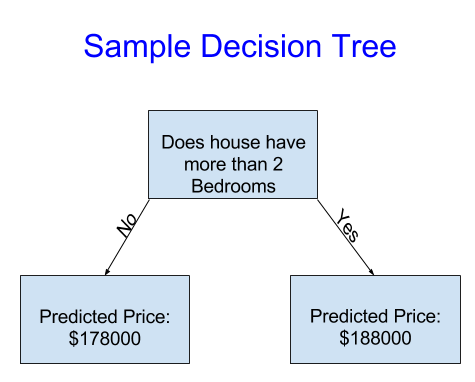

It divides houses into only two categories. The predicted price for any house under consideration is the historical average price of houses in the same category.

We use data to decide how to break the houses into two groups, and then again to determine the predicted price in each group. This step of capturing patterns from data is called fitting or training the model. The data used to fit the model is called the training data.

The details of how the model is fit (e.g. how to split up the data) is complex enough that we will save it for later. After the model has been fit, you can apply it to new data to predict prices of additional homes.

## Improving the Decision Tree
Which of the following two decision trees is more likely to result from fitting the real estate training data?
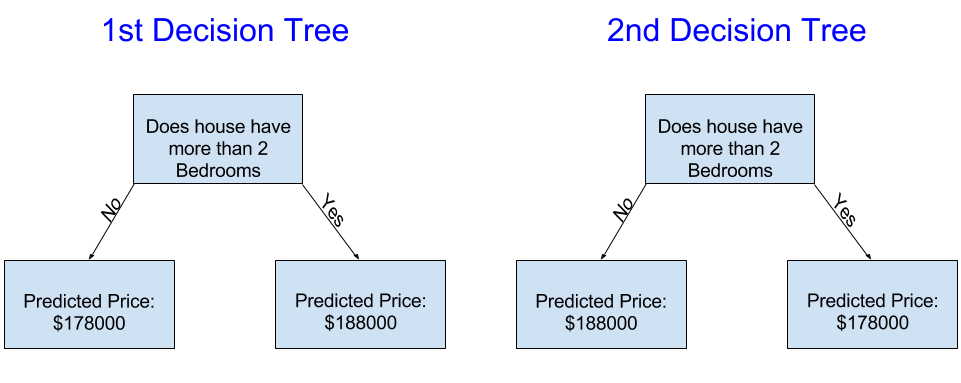

The decision tree on the left (Decision Tree 1) probably makes more sense, because it captures the reality that houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms. The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like number of bathrooms, lot size, location, etc.

You can capture more factors using a tree that has more "splits." These are called "deeper" trees. A decision tree that also considers the total size of each house's lot might look like this:
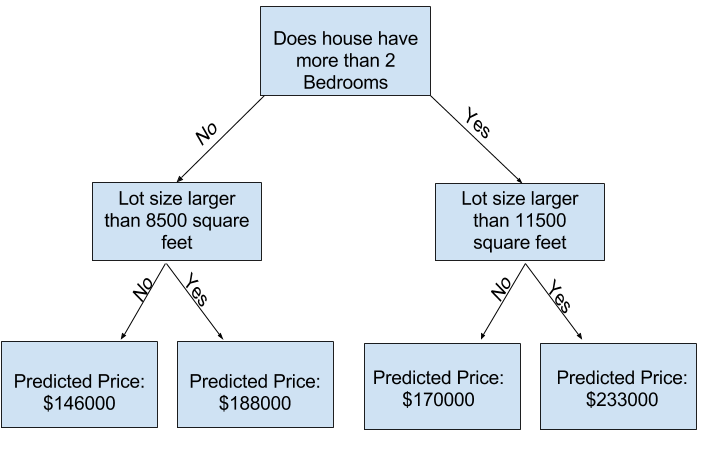

You predict the price of any house by tracing through the decision tree, always picking the path corresponding to that house's characteristics. The predicted price for the house is at the bottom of the tree. The point at the bottom where we make a prediction is called a leaf.

The splits and values at the leaves will be determined by the data, so it's time for you to check out the data you will be working with.

In [ ]:
# First, let's import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Next, load the dataset
df = pd.read_csv('data/melb_data.csv') # replace with your CSV's path

In [ ]:
# Print the first few rows of the dataset
df.head()

In [ ]:
# Print some descriptives and statistiscs
df.describe()

# Excercise Your First Machine Learning Model
## Exercise 1.1 Data Preparation
### What does the data look like?
- print the data types (numerical / categorical)
- Are there any missing values?
.info() will give you some information about the dataframe. What can you tell?

In [ ]:
df.info()

In [ ]:
column_with_missing_values = '' #TODO fill in the name of the column where you suspect missing values
sum(df['BuildingArea'].isna()) # sums up all the rows withs missing values, 'isna' means 'is Not Available'

In [ ]:
# delete all the rows with missing values
df = df.dropna(axis=0)

## Exercise 1.2 Data exploration
### Selecting Data for Modeling
Your dataset had too many variables to wrap your head around, or even to print out nicely. How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame (the bottom line of code below).


In [ ]:
# this line will print all the column names
df.columns

### What is the pattern you want to find?
- Use the correlation matrix from the previous deepdive session
- Find the columns with the highest correlation with price (=features)
- Make a scatter plot for each feature

In [ ]:
columns_to_correlate = ['Price', ''] # TODO: fill in the chosen column names 
correlation_matrix = df[columns_to_correlate].corr()

print("Correlation matrix:")
print(correlation_matrix)

In [ ]:
# Choose the the highest correlation and make a scatter plot
COLUMN_NAME = ''
# Scatter plot of Price vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df[COLUMN_NAME], alpha=0.2)
plt.title(f'Price vs {COLUMN_NAME}')
plt.xlabel(COLUMN_NAME)
plt.ylabel('Price')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

## Exercise 1.3 Data selection
### You want to predict the price: Which features do select choose?
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

In [ ]:
# Visually checking your data is an important part of a data scientist's job. 
# You'll frequently find surprises in the dataset that deserve further inspection.
features = ['FEATURE 1', 'FEATURE 2', 'FEATURE 3']
X = df[features]
X.head()

In [ ]:
prediction_target = '' # what is the target you want to predict?
y = df[prediction_target]
y.head()

## Exercise 1.4  Building Your Model
### Fitting the statistical formula

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

- Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- Fit: Capture patterns from provided data. This is the heart of modeling.
- Predict: Just what it sounds like
- Evaluate: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [ ]:
X = df[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]
y = df.Price

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model, this is actually the training part!
melbourne_model.fit(X, y)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

### Model validation (prediction error)

 If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

```
error = actual price - predicted price
```

So, if a house actually costs 150,000 and you predicted it would cost 100,000 the error is 50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as:

*On average, our predictions are off by about X.*

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_error = mean_absolute_error(y, predicted_home_prices)
print(f"Mean absolute error = {mean_error}")

### Seems like a lot??
How do we know if this "good"? We don't now yet! The secret is to try out lots of different things: tweak parameters, add/remove features, and try to get this error as low as possible!

### Coefficient of Determination (R^2 Score)

Another metric we can use to measure the quality of our model is the Coefficient of Determination, or R^2 Score. This metric provides us with a measure of how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

The R^2 score ranges from 0 to 1, where 1 means the model perfectly predicts the actual values, and 0 means the model does not predict the outcomes any better than a simple average of the target values.

Let's break it down:

If R^2 = 1, the regression predictions perfectly fit the data. The closer R^2 is to 1, the better the model fits your data. If R^2 = 0, the model does not explain any of the variability of the response data around its mean. If R^2 < 0, the model is a worse fit to your data than a horizontal line.

In other words, it can be said as:

Our model can explain X% of the variance in house prices.

In [ ]:
from sklearn.metrics import r2_score

predicted_home_prices = melbourne_model.predict(X)
score = r2_score(y, predicted_home_prices)

print(f"R^2 Score = {score}")

## Exercise 1.5  Optimizing Your Model
### What happens if you select different features in excercise 1.2?? Try it out
Try lowering the mean absolute error, once the error won't decrease anymore you have found the optimal features! Make sure to use only numerical values!

In [ ]:
features = ['FEATURE 1', 'FEATURE 2', 'FEATURE 3']
X = df[features]

# prediction_target stays the same 
y = df[prediction_target]

# Define model
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)


# How different are the results?
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

predicted_home_prices = melbourne_model.predict(X)
mean_error = mean_absolute_error(y, predicted_home_prices)
print(f"Mean absolute error = {mean_error}")

score = r2_score(y, predicted_home_prices)
print(f"R^2 Score = {score}")

# Excersice 2 Model Validation
The Problem with "In-Sample" Scores
The error we computed in the last excercise can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data (data used to fit the statistical model), the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called **validation data.**

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.


In [ ]:
X = df[['Rooms', 'Landsize']]

# prediction_target stays the same 
y = df[prediction_target]

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

# we iterate over 5 values (percentages) and print the error per validation size
# 0.1 means that 10% of the dataset will be used for validation and 90% for training
for val_size in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=val_size, random_state = 0)
    # Define model
    melbourne_model = DecisionTreeRegressor()
    # Fit model
    melbourne_model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = melbourne_model.predict(val_X)
    print(val_size, r2_score(val_y, val_predictions))

### What happens with the error when the test-train split changes?

### Exercise 2.1
25% is usually the default setting for the test size
- use the optimal features from excercise 1.5 
- split the data in a training and validation set
- print the mean absolute error

In [ ]:
# fill in the names of the features
features = ['FEATURE 1', 'FEATURE 2', 'FEATURE 3']
X = df[features]

# fill in the name of the prediction target between the ''
y = df['prediction_target']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size= , random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict( ) # fill in the features (X) you want to predict
print(val_size, mean_absolute_error( )) # fill in the actual prices and predicted prices to calculate the error

# Bias and Variance in Machine Learning

-  Bias: Assumptions made by a model to make a function easier to learn. It is actually the error rate of the training data. When the error rate has a high value, we call it High Bias and when the error rate has a low value, we call it low Bias.
- Variance: The difference between the error rate of training data and testing data is called variance. If the difference is high then it’s called high variance and when the difference in errors is low then it’s called low variance. Usually, we want to make a low variance for generalized our model.

![Image: Steps of creating a ML Model](images/under_over_fit.png)

### Exercise 3
**Feature Selection and Model Tuning**

In this exercise, your task is to build a decision tree model to predict housing prices and achieve the best `r2_score` possible. Your focus will be on selecting the most relevant features and tuning your decision tree's complexity using the `max_leaf_nodes` parameter.

Depending on the chosen feature you might run into an error when your Decision Tree encounters missing values or non-numerical values. 

The goal is to achieve the highest possible `r2_score` and lowest `mean_absolute_error`. 

Be carefull not to **overfit** or **underfit** your model! 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

feature_columns = ['Rooms'] # MODIFY
NUMBER_OF_NODES = 5 # MODIFY

#load data
X_train_full  = pd.read_csv('data/train_test_split/X_train.csv')
X_test_full  = pd.read_csv('data/train_test_split/X_test.csv')
y_train = pd.read_csv('data/train_test_split/y_train.csv')
y_test = pd.read_csv('data/train_test_split/y_test.csv')

# Keep only the features selected
X_train = X_train_full[feature_columns].copy()
X_test = X_test_full[feature_columns].copy()

# Fill/drop missing values
# TODO (depending on features chosen you might not have missing values)

# Define model
model = DecisionTreeRegressor(max_leaf_nodes=NUMBER_OF_NODES, random_state=1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"R2 score: {r2_score(y_test, predictions)}")